Author: Rodrigo MM Santiago @rodrigommsantiago

In [2]:
# Modules...
import numpy as np              # numeric
import matplotlib.pyplot as plt # plotting

# Funtions for spectral power computations and Butterworth filter
from scipy.signal import welch, butter, filtfilt

# Loading Matlab data files
from scipy.io import loadmat

# plot inline figures
%matplotlib inline

Sub-sampling a signal:

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


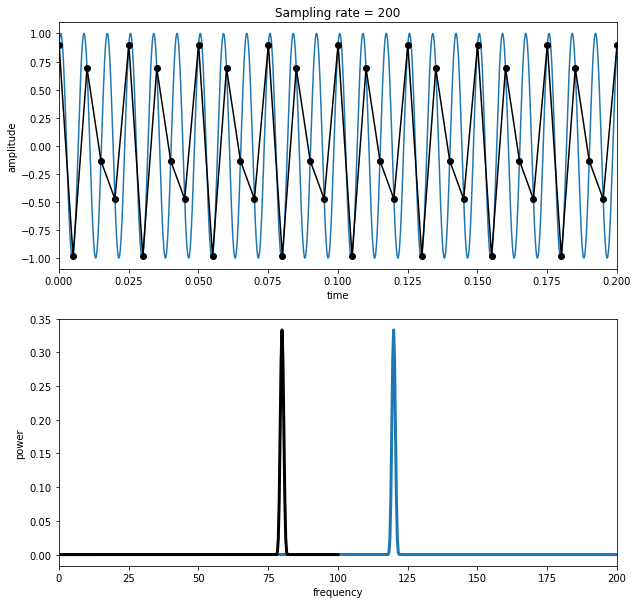

In [3]:
srate = 10000
dt = 1./srate
t = np.arange(dt,3.00001,dt)

signal = np.sin(2*np.pi*120*t+np.pi/3)

plt.figure(figsize=(10,10))

plt.subplot(211)
plt.plot(t,signal)
plt.xlim([0,0.2])
plt.xlabel('time')
plt.ylabel('amplitude')

plt.subplot(212)
win = 1*srate
nfft = 3*srate
F,Pxx = welch(signal,srate,nperseg=win,nfft=nfft)
plt.plot(F,Pxx,linewidth=3)
plt.xlim([0,800])
plt.xlabel('frequency')
plt.ylabel('power')

# Sub-sampling
subsamplingfactor = 50
signal2 = signal[0:len(signal):subsamplingfactor]
srate2 = srate/subsamplingfactor
t2 = t[0:len(t):subsamplingfactor]

plt.subplot(211)
plt.plot(t2,signal2,'ko-')
plt.title('Sampling rate = '+str(srate2))

plt.subplot(212)
win2 = 1*srate2
nfft2 = 3*srate2
F2,Pxx2 = welch(signal2,srate2,nperseg=win2,nfft=nfft2)
plt.plot(F2,Pxx2,'k-',linewidth=3)
plt.xlim([0,200]);

Sub-sampling a signal with multiple frequencies:

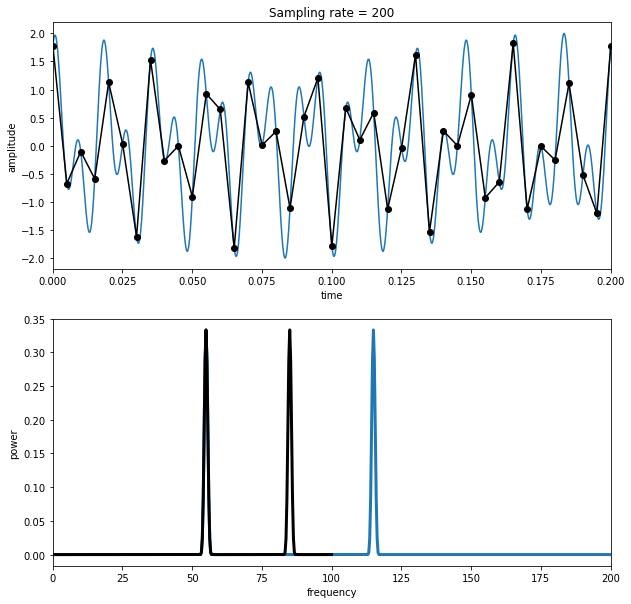

In [5]:
srate = 10000
dt = 1./srate
t = np.arange(dt,3.00001,dt)

signal = np.sin(2*np.pi*55*t+np.pi/3)+np.sin(2*np.pi*115*t+np.pi/3)

plt.figure(figsize=(10,10))

plt.subplot(211)
plt.plot(t,signal)
plt.xlim([0,0.2])
plt.xlabel('time')
plt.ylabel('amplitude')

plt.subplot(212)
win = 1*srate
nfft = 3*srate
F,Pxx = welch(signal,srate,nperseg=win,nfft=nfft)
plt.plot(F,Pxx,linewidth=3)
plt.xlim([0,200])
plt.xlabel('frequency')
plt.ylabel('power')

# Sub-sampling
subsamplingfactor = 50
signal2 = signal[0:len(signal):subsamplingfactor]
srate2 = srate/subsamplingfactor
t2 = t[0:len(t):subsamplingfactor]

plt.subplot(211)
plt.plot(t2,signal2,'ko-')
plt.title('Sampling rate = '+str(srate2))

plt.subplot(212)
win2 = 1*srate2
nfft2 = 3*srate2
F2,Pxx2 = welch(signal2,srate2,nperseg=win2,nfft=nfft2)
plt.plot(F2,Pxx2,'k-',linewidth=3)
plt.xlim([0,200]);

Using a low-pass filter on the signal:

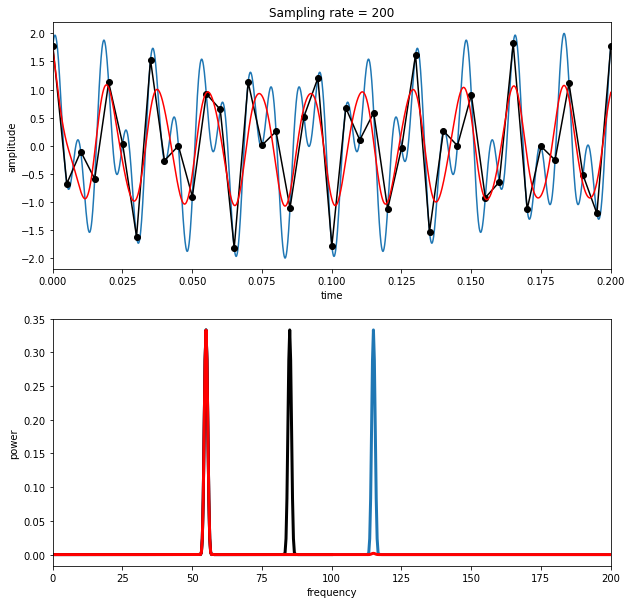

In [6]:
srate = 10000
dt = 1./srate
t = np.arange(dt,3.00001,dt)

signal = np.sin(2*np.pi*55*t+np.pi/3)+np.sin(2*np.pi*115*t+np.pi/3)

plt.figure(figsize=(10,10))

plt.subplot(211)
plt.plot(t,signal)
plt.xlim([0,0.2])
plt.xlabel('time')
plt.ylabel('amplitude')

plt.subplot(212)
win = 1*srate
nfft = 3*srate
F,Pxx = welch(signal,srate,nperseg=win,nfft=nfft)
plt.plot(F,Pxx,linewidth=3)
plt.xlim([0,200])
plt.xlabel('frequency')
plt.ylabel('power')

# Sub-sampling
subsamplingfactor = 50
signal2 = signal[0:len(signal):subsamplingfactor]
srate2 = srate/subsamplingfactor
t2 = t[0:len(t):subsamplingfactor]

plt.subplot(211)
plt.plot(t2,signal2,'ko-')
plt.title('Sampling rate = '+str(srate2))

plt.subplot(212)
win2 = 1*srate2
nfft2 = 3*srate2
F2,Pxx2 = welch(signal2,srate2,nperseg=win2,nfft=nfft2)
plt.plot(F2,Pxx2,'k-',linewidth=3)
plt.xlim([0,200]);

# Filtering the signal
order = 9 # filt order
nyq = 0.5*srate # Nyquist frequency
low_freq = 100 # low-pass frequency
lowcut = low_freq/nyq # starting point for signal atenuation
b,a = butter(order,lowcut,'low') # Butterworth filter
# filtered signal
filtered = filtfilt(b,a,signal)

plt.subplot(211)
plt.plot(t,filtered,'r')

plt.subplot(212)
F,Pxx = welch(filtered,srate,nperseg=win,nfft=nfft)
plt.plot(F,Pxx,'r',linewidth=3)
plt.xlim([0,200])
plt.xlabel('frequency')
plt.ylabel('power');